<a href="https://colab.research.google.com/github/lee1201zxc/study/blob/main/AI/ML/07_3_DropOut_EarlyStop_CallBack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fit()는 History 클래스 객체를 반환(훈련 과정에서 계산한 지표, 손실, 정확도 값이 저장)

In [2]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled=train_input/255.0

train_scaled, val_scaled, train_target, val_target= train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 모델 생성하는 함수 생성
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Input(shape=(28,28)))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)


dict_keys(['accuracy', 'loss'])



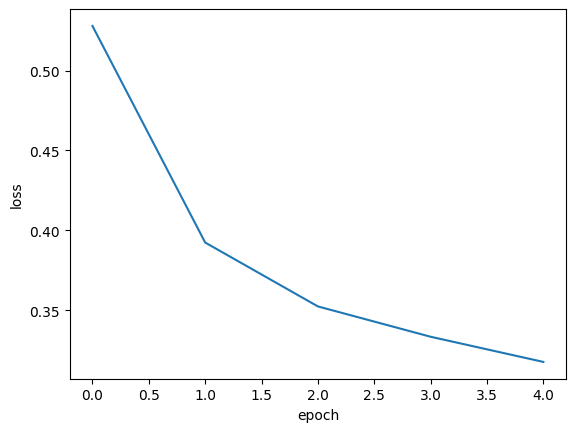

In [4]:
model = model_fn()
model.summary()

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# fit은 history 객체 반환, verbose = 훈련 과정 출력을 조절, 1=기본, 2->막대 빼기, 0->나타내지 않기
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)
print()

#history에 포함된 속성들
print(history.history.keys())
print()

#각 epoch마다 손실 그래프화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


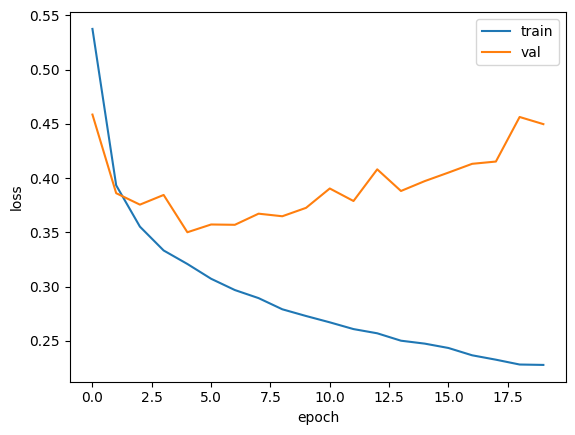

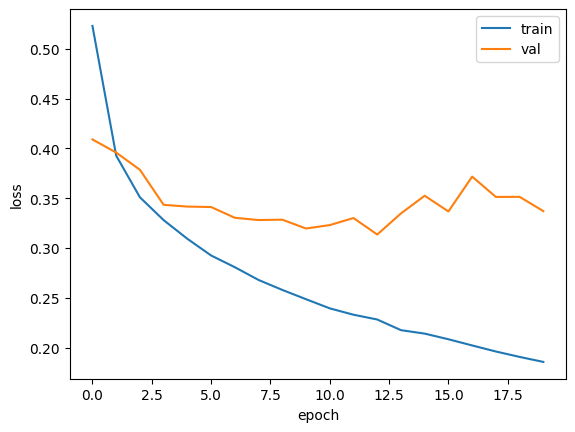

In [5]:
model= model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#에포크마다 검증 손실 계산위해 fit에 검증 데이터 전달
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
#history출력시 val_accuarcy, val_loss추가됨
print(history.history.keys())

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


# Adam이용 -> RMSprop보다 오버피팅 약해짐

model= model_fn()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()


##드롭아웃
일부 뉴런을 끔.

특정 뉴런에 의존하는 것을 방지

모델에 넣으면 학습 중에만 끄고 평가때는 끄지 않고 모든 뉴런을 씀

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

None


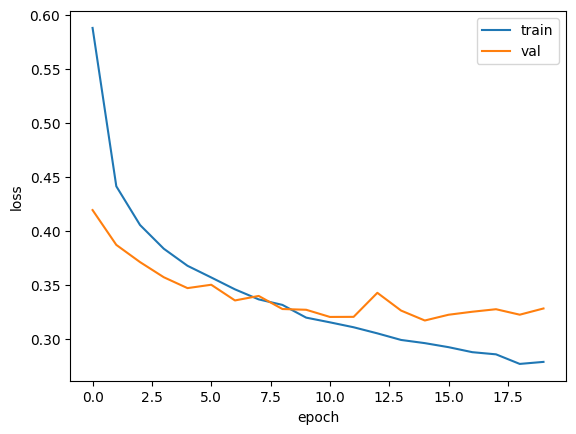

In [7]:
# 드롭아웃 넣기, 앞에 있는 층의 30%를 끔(여러 층 끌려면 여러번 써야)
model = model_fn(keras.layers.Dropout(0.3))
print(model.summary())

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

#오버피팅이 줄음

## 모델 저장, 복원, 콜백, Early Stop

ModelCheckpoint -> 가장 성능 좋은 모델을 저장

EarlyStopping -> 성능 향상이 이뤄지지 않으면 조기 종료

In [11]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=11, verbose=0, validation_data=(val_scaled, val_target))

#모델 구조와 파라미터 함께 저장, .keras확장자 파일에 저장
model.save('model-whole.keras')
#파라미터만 저장, .h5 확장자로 끝나야함
model.save_weights('model.weights.h5')

#잘 만들어졌는지 확인
!ls -al model*

#save로 저장한 모델 가져오기
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

# save_weights로 저장한 모델 가져오기, save로 저장한 모델과 정확히 같은 구조를 가져야함
# 이걸로 모델 평가하려면 반드시 compile해줘야함(loss, optimizer 정보 없어서)
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')



#####

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#  save_best_only=True -> 가장 좋은 성능 모델만 저장함 best-model.keras에 구조, 가중치 정보
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)

# Early Stop, patience -> 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

#콜백 리스트에 2개 전달
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 조기 종료된 에포크 출력, 이 에포크-patience값이 최상 모델
print(early_stopping_cb.stopped_epoch)

-rw-r--r-- 1 root root 976600 Feb 13 12:33 model.weights.h5
-rw-r--r-- 1 root root 979409 Feb 13 12:33 model-whole.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3355
13
